Restarting session

In [102]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

Relevant libraries

In [103]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

# ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [104]:
#additional
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC

In [105]:
# View the travel data
travel = pd.read_csv("Customertravel.csv")
travel


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [106]:
len(travel)

954

##**Evaluating data structure:** 
Analysing the dataset using the head and column method to understand the input data and how best to analyze it.

This is a tour & travels Company churn dataset where each record entails whether the customer is a frequent flyer, their income class, number of times services opted for, if they synched social media, if they use the app to book hotels, and churn.

In [107]:
travel.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

Describe method shows that customers' average age is 32 and that customers have opted to use a service an average of 2 times during recent years.

In [108]:
travel.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


****dataset shows several numerical and categorical columns providing various information on the customer transactions.**

In [109]:
travel.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

Re-validating column data types and missing values:

In [110]:
travel.isna().any()

Age                           False
FrequentFlyer                 False
AnnualIncomeClass             False
ServicesOpted                 False
AccountSyncedToSocialMedia    False
BookedHotelOrNot              False
Target                        False
dtype: bool

Since we saw "no record" under the frequent flyer column when we scanned our data we know the above is inaccurate

In [111]:
#changing "no record" to NaN
travel = travel.replace('No Record', np.nan)
travel.isna().any()

Age                           False
FrequentFlyer                  True
AnnualIncomeClass             False
ServicesOpted                 False
AccountSyncedToSocialMedia    False
BookedHotelOrNot              False
Target                        False
dtype: bool

In [112]:
travel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [113]:
travel.isna().sum()

Age                            0
FrequentFlyer                 60
AnnualIncomeClass              0
ServicesOpted                  0
AccountSyncedToSocialMedia     0
BookedHotelOrNot               0
Target                         0
dtype: int64

In [114]:
travel.columns.to_series().groupby(travel.dtypes).groups

{int64: ['Age', 'ServicesOpted', 'Target'], object: ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']}

In [115]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               894 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


The dataset contains 954 rows and 7 columns. There are 60 missing values in the dataset.

The dataset contains 954 customers (i.e. rows) and 7 features about the customers and their churn/active status. The goal here is to predict whether a customer will churn (i.e. exited = 1) using the provided features. Thus, in terms of machine learning, we aim to build a supervised learning algorithm to perform a classification task.


# **Clean the Dataset**

for our machine learning models, we're leaving "Target" column as numeric. 0 and 1 represent False and True.

In [116]:
travel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


####**Missing values**

In [117]:
#looking at the data to see if we want to drop the columns with missing data or change the NaN values to 'yes' or 'no'
sample_incomplete_rows = travel[travel.isnull().any(axis=1)].head()
sample_incomplete_rows

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
12,35,NaN,Middle Income,1,Yes,Yes,0
23,30,NaN,Middle Income,2,No,No,0
34,30,NaN,Low Income,4,No,No,0
56,30,NaN,Middle Income,3,Yes,Yes,0
67,37,NaN,Low Income,2,Yes,No,1


In [118]:
#The data will be dropped 
travel.dropna(subset = ["FrequentFlyer"], inplace = True)


In [119]:
#revalidate to ensure there are no null values in the dataset.
travel.isna().any()

Age                           False
FrequentFlyer                 False
AnnualIncomeClass             False
ServicesOpted                 False
AccountSyncedToSocialMedia    False
BookedHotelOrNot              False
Target                        False
dtype: bool

In [120]:
len(travel)

894

**Updated:** The dataset now contains 894 rows and 7 columns.

# **Data Evaluation**

**Data Descriptions**

Age: Age of user

FrequentFlyer: Whether Customer takes frequent flights

AnnualIncomeClass: Class of annual income of user

ServicesOpted: Number of times services opted during recent years

AccountSyncedToSocialMedia: Whether Company Account Of User Synchronized to Their Social Media

BookedHotelOrNot: Whether the customer book lodgings/Hotels using company services

Target: 1- Customer Churns 0- Customer doesn’t churn

In [121]:
travel

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


# **Exploratory Data Analysis:** 

explore and visualize the data set by viewing distribution of independent variables.This will help to understand the patterns in the data and to potentially form some hypothesis.

**Target Feature: Churn**

Description: Whether the passenger churned or not.

Key: 0 = active, 1 = churned

This is the variable we want our machine learning model to predict based off all the others.

**Check target variable distribution**:


Per below, the data set has a high proportion of users who do not churn compared to users who do churn.

0    678
1    216
Name: Target, dtype: int64

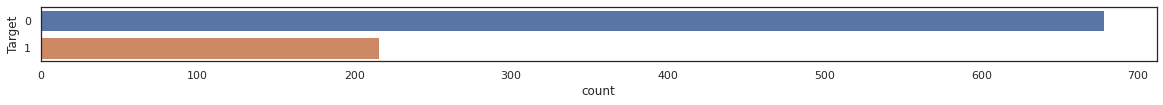

In [122]:
# How many people churned?
fig = plt.figure(figsize=(20,1))
sn.countplot(y='Target', data=travel)
travel["Target"].value_counts()

In [123]:
# Key: 1- Customer Churns, 0- Customer Does Not Churn
travel.groupby('Target').describe()

Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Target                                                             
0       678.0  32.414454  3.221635  27.0  30.0  31.0  36.0  38.0   
1       216.0  31.351852  3.588910  27.0  28.0  30.0  35.0  38.0   

       ServicesOpted                                               
               count      mean       std  min  25%  50%  75%  max  
Target                                                             
0              678.0  2.379056  1.545749  1.0  1.0  2.0  3.0  6.0  
1              216.0  2.550926  1.788126  1.0  1.0  2.0  4.0  6.0

**Overall Churn Rate:** The overall churn rate shows that around 76% of the customers are active.

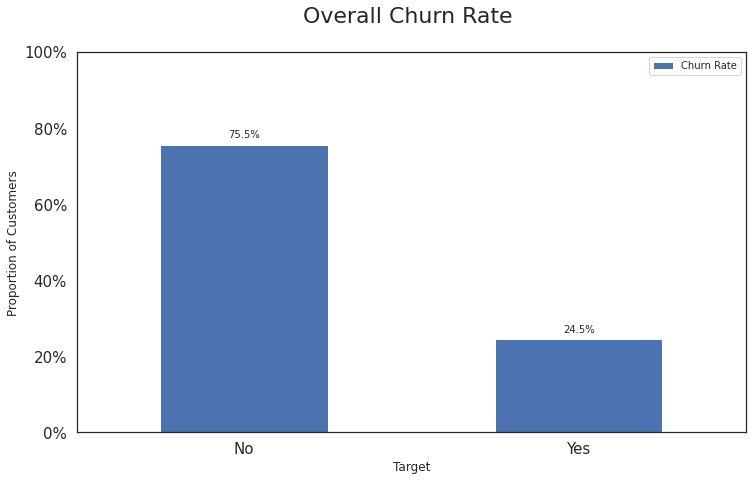

In [124]:
# Creating new DF with ID column to calculate churn rate
travel_churn_rate = pd.DataFrame()
travel_churn_rate = travel.copy()
travel_churn_rate["ID"] = travel_churn_rate.index + 1

#calculating churn rate and plotting 
import matplotlib.ticker as mtick
churn_rate = travel_churn_rate[["Target", "ID"]]
churn_rate ["churn_label"] = pd.Series(
np.where((churn_rate["Target"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["ID"].count())
churn_rate ["Churn Rate"] = (
churn_rate ["ID"]/ sum(churn_rate ["ID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), fontsize = 15, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Target',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["ID"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)
        ax.annotate(label,
                (x_value, y_value),         
                 xytext=(0, space),
                 textcoords="offset points", 
                 ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

####**Histograms of numeric Columns:**

**Age**

Observations:
The age distribution shows that a majority of the customers are 30 years of age. All the customers in the data set are between the ages of 27 and 38.

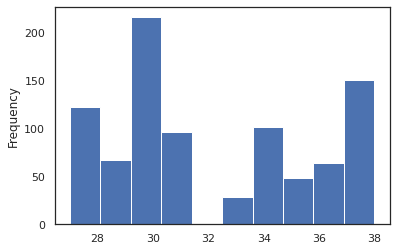

In [125]:
travel.Age.plot.hist()

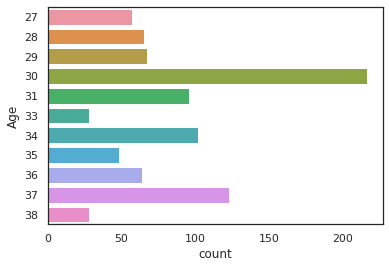

In [126]:
# What is the age distribution?
sn.countplot(y='Age', data=travel)

**Frequent Flyer**

Observations:
The table below shows that most users are not frequent flyers.

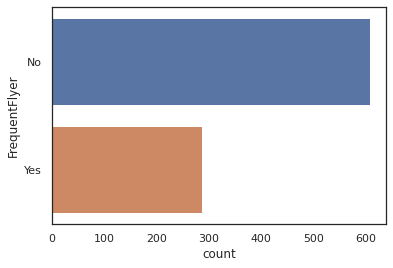

In [127]:
sn.countplot(y="FrequentFlyer", data=travel);

**Annual Income Class**

Annual income class is evenely distributed among low and middle class with most users either having low or middle income.

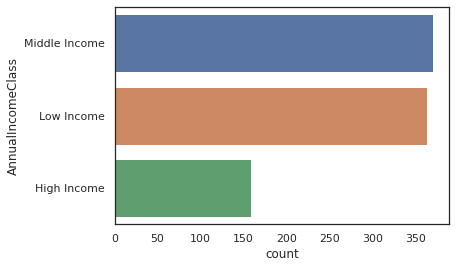

In [128]:
sn.countplot(y="AnnualIncomeClass", data=travel);

**Services Opted**

During recent years, the majority of users opt to use services once.


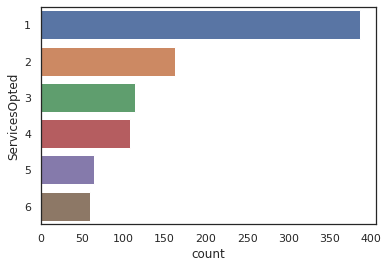

In [129]:
# Services Opted Distribution?
sn.countplot(y="ServicesOpted", data=travel);

**Account Synced To Social Media**

Almost 40% of the people have their accounts synched to social media, while the rest, about 60%, do not. 

No     561
Yes    333
Name: AccountSyncedToSocialMedia, dtype: int64


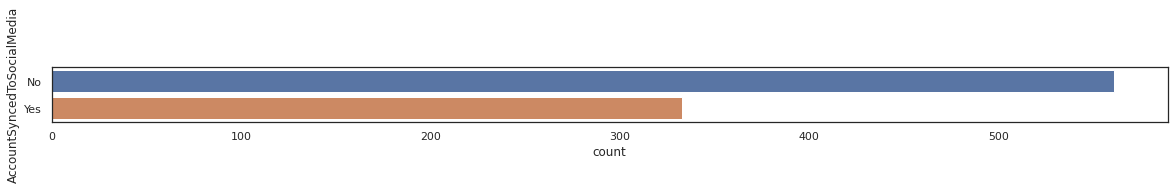

In [130]:
# How many people have their accounts linked to a social media account?
fig = plt.figure(figsize=(20,1))
sn.countplot(y='AccountSyncedToSocialMedia', data=travel);
print(travel.AccountSyncedToSocialMedia.value_counts())


**Booked Hotel Or Not**

Most people do not use the app to book accommodations. About 40% do.

No     542
Yes    352
Name: BookedHotelOrNot, dtype: int64


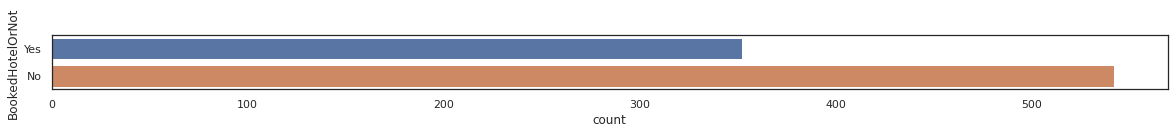

In [131]:
# How many customers book lodgings/Hotels using company service?
fig = plt.figure(figsize=(20,1))
sn.countplot(y='BookedHotelOrNot', data=travel);
print(travel.	BookedHotelOrNot.value_counts())


In [132]:
#looking at the data
travel.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


# **Correlation Analysis**

######**Numerical Values**

The highest correlation is between services opted and hotel booking through app. Churn and accommodation booking have a negative correlation. Churn and age are also negatively correlated.

***Label Encode Binary data: "Since Machine Learning algorithms typically only have numerical values as their independent variables, label encoding is pivotal to encode categorical labels with appropriate numerical values." ***

Label encoding all categorical variables that have only two unique values.

In [133]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in travel.columns[1:]:
    if travel[col].dtype == 'object':
        if len(list(travel[col].unique())) <= 2:
            le.fit(travel[col])
            travel[col] = le.transform(travel[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


######**Transforming categoical variables.**

In [134]:
#Transform Frequent Flyer and Income Class data to scale for our model
cleanup_nums = {'FrequentFlyer': {'No': 0, 'Yes': 1},
                'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}}

In [135]:
df1 = travel.replace(cleanup_nums)
df1.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0


In [136]:
df1.corr()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
Age,1.000000,0.041550,-0.023705,-0.005478,-0.026673,0.035276,-0.136133
FrequentFlyer,0.041550,1.000000,0.320702,-0.174980,-0.091913,-0.199319,0.436410
AnnualIncomeClass,-0.023705,0.320702,1.000000,0.088902,-0.227157,-0.032267,0.148727
ServicesOpted,-0.005478,-0.174980,0.088902,1.000000,-0.141135,0.159459,0.045770
AccountSyncedToSocialMedia,-0.026673,-0.091913,-0.227157,-0.141135,1.000000,-0.104721,0.078608
BookedHotelOrNot,0.035276,-0.199319,-0.032267,0.159459,-0.104721,1.000000,-0.208839
Target,-0.136133,0.436410,0.148727,0.045770,0.078608,-0.208839,1.000000


**plot positive and negative correlations:**
The churn rate increases with frequent flyer and annual income class while age and Hotel booking via app seem to be negatively related to churn. Frequent flyers churn the most.

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

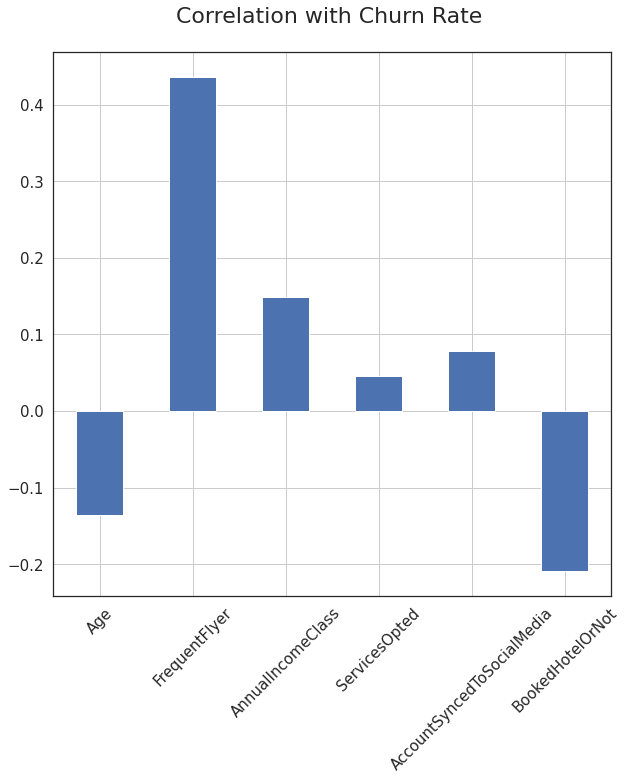

In [137]:
correlations = df1.corrwith(df1.Target)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (10, 10), 
        fontsize = 15, 
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [138]:
travel2 = df1[['Age', 'AnnualIncomeClass','ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'Target']]
correlations = travel2.corrwith(travel.Target)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 AnnualIncomeClass             0.148727
AccountSyncedToSocialMedia    0.078608
ServicesOpted                 0.045770
dtype: float64

Most Negative Correlations: 
 Age                -0.136133
BookedHotelOrNot   -0.208839
dtype: float64


####**Negative Correlation Analysis**
Further Exploring the relationship between churn and Hotel Booking: Churn is lower in those who booked hotels.

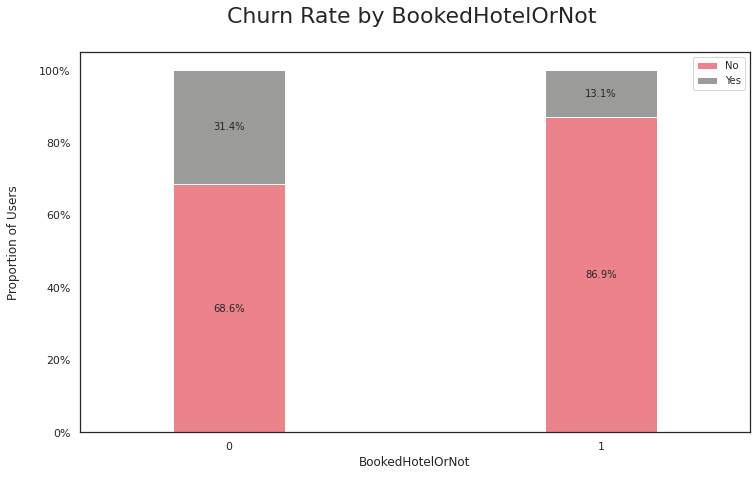

In [139]:
import matplotlib.ticker as mtick
booking_churn = travel.groupby(['BookedHotelOrNot','Target']).size().unstack()
booking_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (booking_churn.T*100.0 / booking_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Users\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('BookedHotelOrNot\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by BookedHotelOrNot \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

To visualize the negative relationship between age and churn and to see the age distribution of customers who churn.
The chart shows that people ages 27 and 28 churn the most.

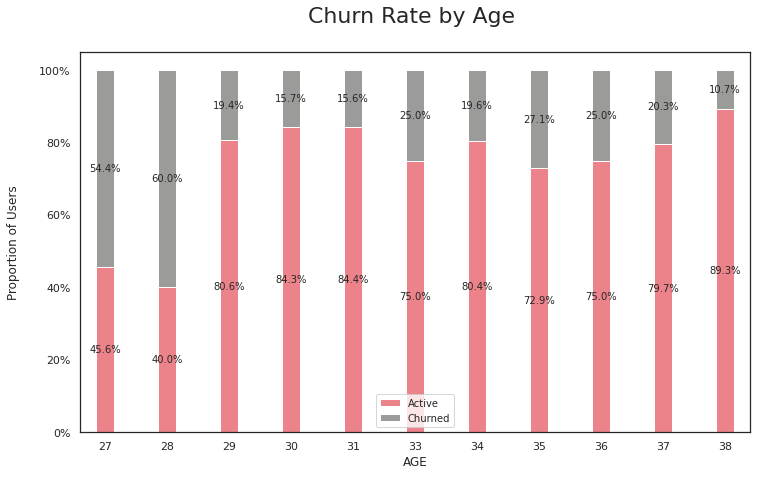

In [140]:
churn_by_age = travel.groupby(['Age','Target']).size().unstack()
churn_by_age.rename(columns={0:'Active', 1:'Churned'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (churn_by_age.T*100.0 / churn_by_age.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Users\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('AGE\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Age \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

####**Positive Correlation Analysis**
**Churn Rate by Annual Income Class:** As shown in the chart below, those with high income have a very high probability to churn compared to those with middle to low income.

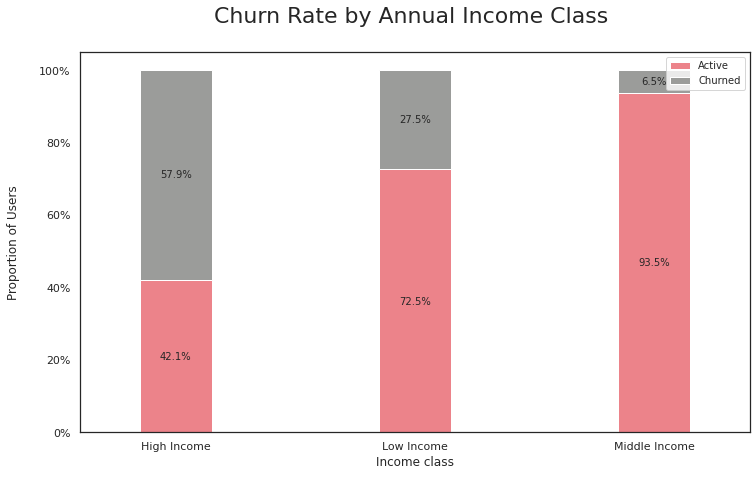

In [141]:
income_churn = travel.groupby(['AnnualIncomeClass','Target']).size().unstack()
income_churn.rename(columns={0:'Active', 1:'Churned'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (income_churn.T*100.0 / income_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Users\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Income class\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Annual Income Class \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

**Churn Rate by Frequent Flyer Feature:** frequent flyers seem to churn more.

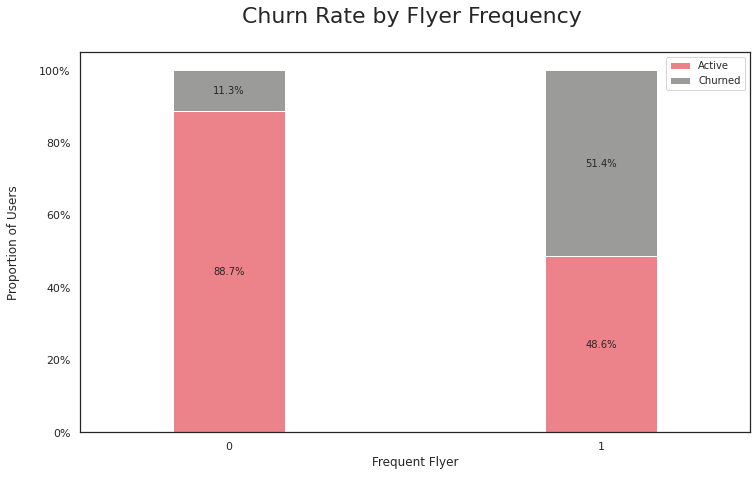

In [142]:
Freq_flyer_churn = travel.groupby(['FrequentFlyer','Target']).size().unstack()
Freq_flyer_churn.rename(columns={0:'Active', 1:'Churned'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (Freq_flyer_churn.T*100.0 / Freq_flyer_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Users\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Frequent Flyer\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Flyer Frequency \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

Plot Correlation Matrix of all independent variables: Correlation matrix helps us to discover the relationship between independent variables in a dataset.

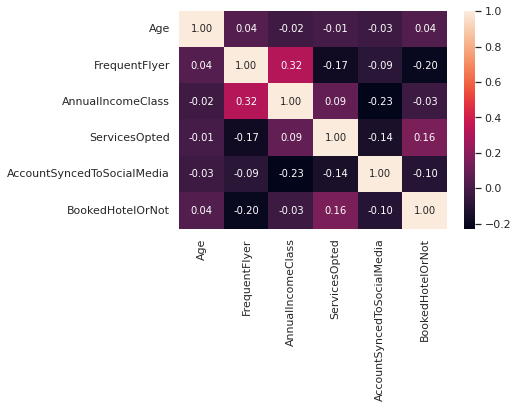

In [143]:
#visualizing correlation via heatmap
df1_no_churn = df1.drop(columns = 'Target')
sn.heatmap(df1_no_churn.corr(),annot=True, fmt='1.2f')

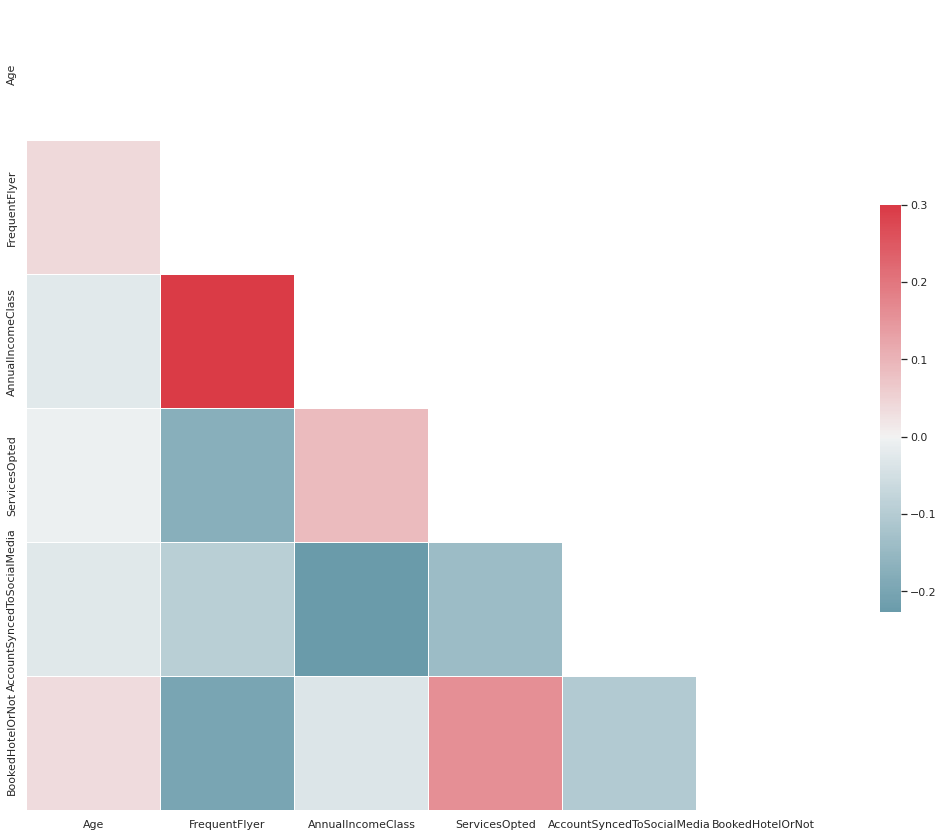

In [144]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = df1_no_churn.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Check Multicollinearity using VIF**: VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. Anywhere exceeding 10 indicates high multicollinearity between the independent variables. If 2 variables have high multicollinearity between them one might have to be dropped.

We can see that none of our features have a high VIF value. Nothing needs to be dropped.

In [145]:
#viewing column namesto use below
list(df1)

['Age',
 'FrequentFlyer',
 'AnnualIncomeClass',
 'ServicesOpted',
 'AccountSyncedToSocialMedia',
 'BookedHotelOrNot',
 'Target']

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df1[['Age','FrequentFlyer','AnnualIncomeClass', 'ServicesOpted','AccountSyncedToSocialMedia','BookedHotelOrNot']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                      feature       VIF
0                         Age  6.559596
1               FrequentFlyer  1.782352
2           AnnualIncomeClass  2.469295
3               ServicesOpted  3.470530
4  AccountSyncedToSocialMedia  1.687552
5            BookedHotelOrNot  1.766477


####**EDA Summary**


*   There were 60 missing values in our data that were dropped
*   The data has a higher proportion of active users than users who churn


*   The strongest positive correlation with the target features is with frequent flyer and income class. This is a group to focus one.

*   The strongest negative correlation with the target features is with age and accounts synched to social media
*   Those with higher income tend to churn more


*   There is no multicollinearity between any of the features


*   The age range is between 27 and 38 years old with most of the customers being 30 years old.
*   27 and 28 year olds churn the most


*   Frequent flyers churned the most in recent years










In [147]:
#taking another look at our data
df1

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0
...,...,...,...,...,...,...,...
949,31,1,0,1,0,0,0
950,30,0,1,5,0,1,0
951,37,0,1,4,0,0,0
952,30,0,0,1,1,1,0


####**Step 3: Machine learning**
The goal of our machine learning model is to predict Churn (label=1) vs Active (label=0) based on the our features.

Splitting the dataset into dependent and independent variables: 
Now we need to separate the dataset into X and y values. y would be the Target column whilst X would be the remaining list of independent variables in the dataset.

In [148]:
#Identify response variable:
    
response = df1["Target"]
features = df1.drop(columns="Target")

**Train-Test Split**

splitting our dataset in 80–20 ratio for training and testing

In [149]:
X_train, X_test, y_train, y_test = train_test_split(features, response,stratify=response, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (715, 6)
Number transactions y_train dataset:  (715,)
Number transactions X_test dataset:  (179, 6)
Number transactions y_test dataset:  (179,)


####**Feature Scaling**
Normalizing the variables before conducting any machine learning (classification) algorithms so that all the training and test variables are scaled within a range of 0 to 1

In [150]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#**Model Selection**

**Compare Baseline Classification Algorithms:** modeling each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores.

Gradient Boosting seems to be the best models based on the loss log and accuracy scores. 

In [151]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True), 
    LinearSVC(),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
  

In [152]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 87.1508%
Log Loss: 4.437956736733164


SVC
****Results****
Accuracy: 82.6816%
Log Loss: 5.981616003458677


LinearSVC
****Results****
Accuracy: 81.5642%
Log Loss: 6.3675196525781805


DecisionTreeClassifier
****Results****
Accuracy: 82.6816%
Log Loss: 5.981611536433926


RandomForestClassifier
****Results****
Accuracy: 90.5028%
Log Loss: 3.2802279212756544


XGBClassifier
****Results****
Accuracy: 89.9441%
Log Loss: 3.473173045298282




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


AdaBoostClassifier
****Results****
Accuracy: 82.6816%
Log Loss: 5.981620470483425


GradientBoostingClassifier
****Results****
Accuracy: 92.7374%
Log Loss: 2.5084027549376486


GaussianNB
****Results****
Accuracy: 81.0056%
Log Loss: 6.560513913873054


LinearDiscriminantAnalysis
****Results****
Accuracy: 82.1229%
Log Loss: 6.174578995580302


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 86.5922%
Log Loss: 4.630915261830041


LogisticRegression
****Results****
Accuracy: 81.0056%
Log Loss: 6.560478177675057




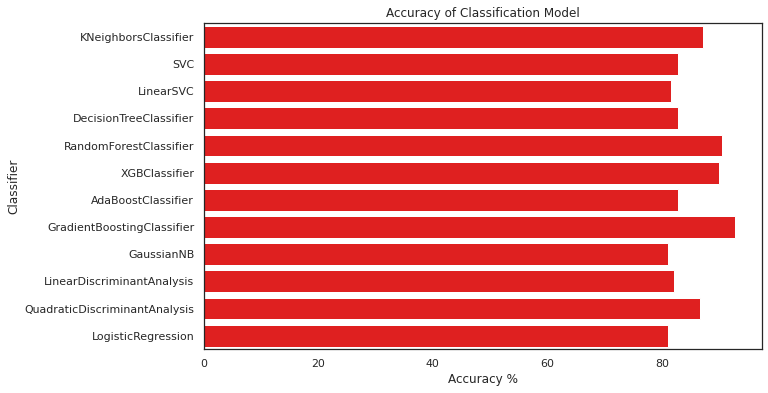

In [153]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sn.set_color_codes("muted")
sn.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "red")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sn.set_color_codes("muted")
plt.show()


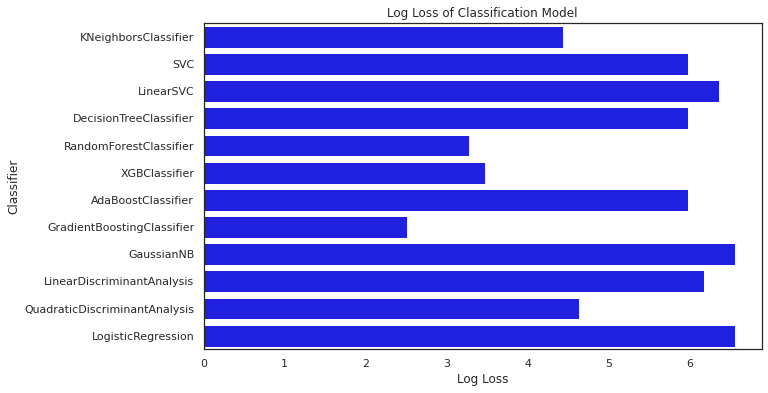

In [154]:
#visualize log loss models
plt.figure(figsize = (10,6))
sn.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "blue")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

####**GradientBoosting Classifier**


In [155]:
GradientBoostingClassifier
# Fitting GradientBoostingClassifier to the Training set
classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['GradientBoosting', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

              Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  GradientBoosting  0.927374        1.0  0.697674  0.821918  0.742574


####**RANDOM FOREST**

In [156]:
# Fitting RandomForestClassifier to the Training set:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Random Forest', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

              Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  GradientBoosting  0.927374   1.000000  0.697674  0.821918  0.742574
1     Random Forest  0.910615   0.909091  0.697674  0.789474  0.731707


####**XGBClassifier**

In [157]:
# Fitting XGBClassifier to the Training set:
classifier = XGBClassifier(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'XGBClassifier', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

              Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  GradientBoosting  0.927374   1.000000  0.697674  0.821918  0.742574
2     XGBClassifier  0.899441   1.000000  0.581395  0.735294  0.634518
1     Random Forest  0.910615   0.909091  0.697674  0.789474  0.731707


####**KNeighbors**
finding the best parameters

Performing a grib search to find the best parameters for the KNeighbors classifier. From the below, 1 n_neighbors and uniform weights are the best parameters.

In [158]:
# -----
# KNeighbors Classifier GridSearch
# -----

param_grid={'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
                          },
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              param_grid, verbose = 1, cv = 3, n_jobs = -1)

grid_search_cv.fit(X_train, y_train)

print("The best Parameters are: ",grid_search_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best Parameters are:  {'n_neighbors': 1, 'weights': 'uniform'}


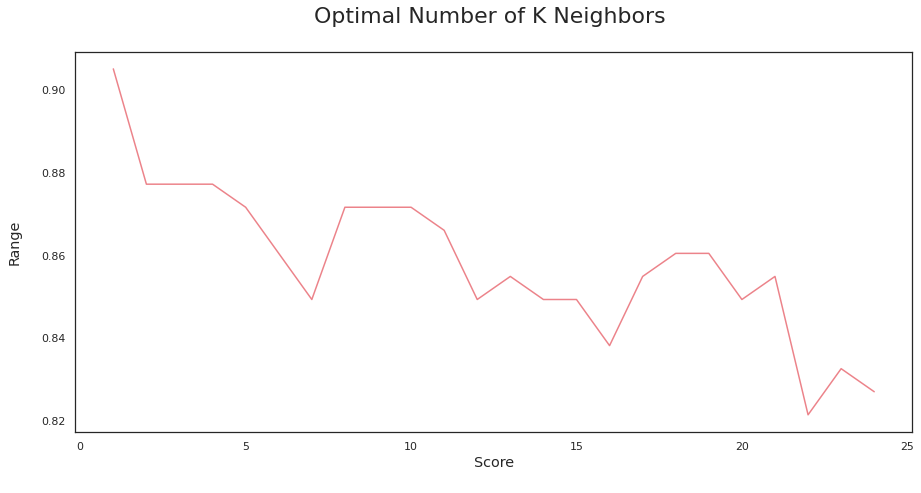

In [159]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Fitting with optimal parameters

In [160]:
# Fitting KN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 1, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['KNeighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

              Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  GradientBoosting  0.927374   1.000000  0.697674  0.821918  0.742574
1     XGBClassifier  0.899441   1.000000  0.581395  0.735294  0.634518
2     Random Forest  0.910615   0.909091  0.697674  0.789474  0.731707
3       KNeighbours  0.905028   0.825000  0.767442  0.795181  0.778302


####**Verifying the best model by checking the ROC CURVE and AUC**

Though classification accuracy is the most common, AUC is important to check since we have class a imbalance, with more active(not churned) users.


In [161]:
from sklearn.metrics import plot_roc_curve

In [162]:
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
xb = XGBClassifier()
gb = GradientBoostingClassifier()

In [163]:
kn.fit(X_train, y_train);
rf.fit(X_train, y_train);
xb.fit(X_train, y_train);
gb.fit(X_train, y_train);

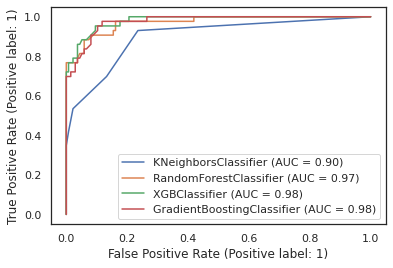

In [164]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(kn, X_test, y_test)
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_);
plot_roc_curve(xb, X_test, y_test, ax=disp.ax_);
plot_roc_curve(gb, X_test, y_test, ax=disp.ax_);

From the AUC , we can conclude that the Gradient Boosting classifier is an optimal model for the given dataset as it has the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. 

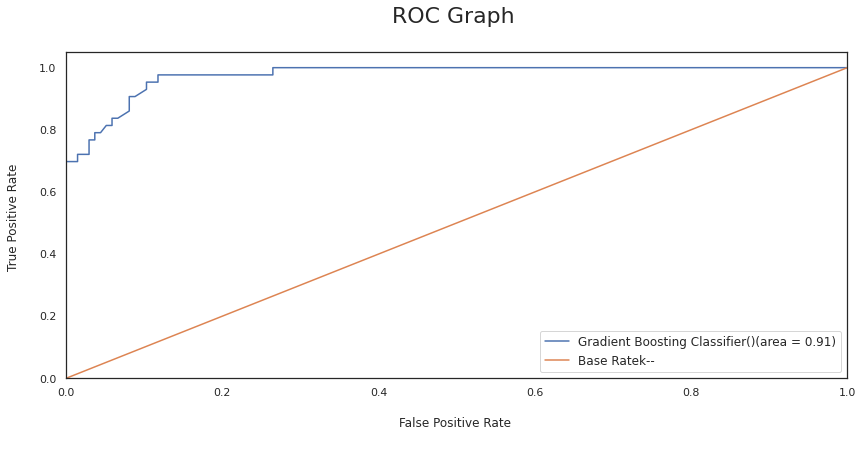

In [165]:
#chosen model ROC Curve
classifier = GradientBoostingClassifier(random_state = 0)

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Gradient Boosting Classifier()(area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#**Model Evaluation**
####Training & evaluating our chosen model:

In [166]:
#classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['GradientBoostingClassifier',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                        Model  Accuracy  Precision    Recall  F1 Score  \
0  GradientBoostingClassifier  0.927374        1.0  0.697674  0.821918   

   F2 Score  
0  0.742574  


####**k-Fold Cross-Validation:**

k-fold Cross Validation results indicate that we would have an accuracy anywhere 88%, give. or take 7%, while running this model on any test set.

In [167]:
accuracies = cross_val_score(estimator = classifier,
 X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), 
accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.88 (+/- 0.07)


####**Confusion Matrix:**
The Confusion matrix indicates that we have 136+30 correct predictions and 13 incorrect predictions.

Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

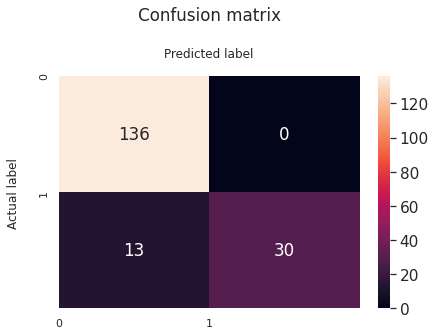

In [168]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

####**Evaluate the model using ROC Graph**

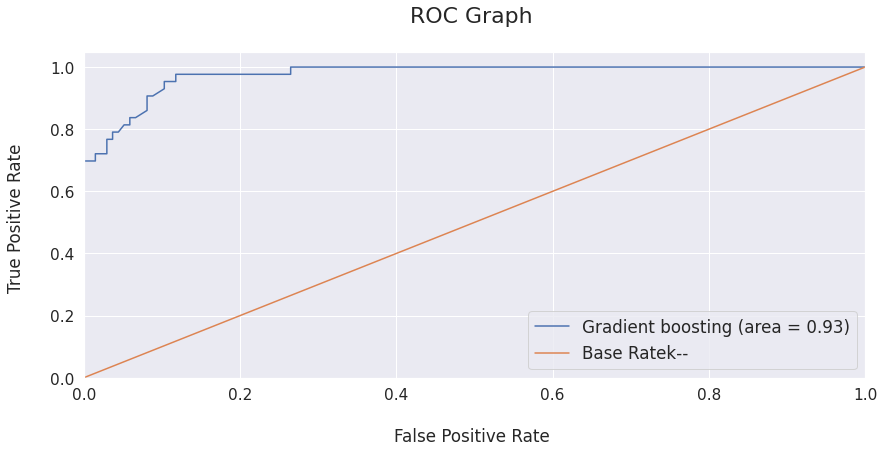

In [169]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot GB ROC
plt.plot(rf_fpr, rf_tpr, 
label='Gradient boosting (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

####**Classification report**

In [170]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       136
           1       1.00      0.70      0.82        43

    accuracy                           0.93       179
   macro avg       0.96      0.85      0.89       179
weighted avg       0.93      0.93      0.92       179



##**Conclusion**
Our chosen machine learning classifier predicts the propensity of a customer to churn with a reasonable accuracy score.

Dataset: https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction


